# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import WEATHER_API_KEY
import json
from datetime import datetime


# Impor the OpenWeatherMap API key
#from api_keys import WEATHER_API_KEY


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

In [26]:
# Testing URL and Get Parameters 
url = "http://api.openweathermap.org/data/2.5/weather?"

city = "London"

# Build query URL
query_url = url + "appid=" + WEATHER_API_KEY + "&q=" + city

# Get weather data
weather_response = requests.get(query_url).json()

print(json.dumps(weather_response, indent=4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1719523680,
    "id": 2643743,
    "main": {
        "feels_like": 288.8,
        "grnd_level": 1007,
        "humidity": 65,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 289.42,
        "temp_max": 290.35,
        "temp_min": 288.01
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1719459920,
        "sunset": 1719519702,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 279,
        "gust": 8.05,
        "speed": 3.13
    }
}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + WEATHER_API_KEY + "&q=" + city + "&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date_unix = city_weather["dt"]
        city_date = datetime.utcfromtimestamp(city_date_unix).strftime('%Y-%m-%d')  # Convert to readable format


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | mount gambier


/var/folders/n8/jw_3cf8s4fs8nvx6zjwvpy480000gn/T/ipykernel_46559/1961260719.py:47: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  city_date = datetime.utcfromtimestamp(city_date_unix).strftime('%Y-%m-%d')  # Convert to readable format


Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | kill devil hills
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | rubio
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | egilsstadir
Processing Record 15 of Set 1 | north bend
Processing Record 16 of Set 1 | horta
Processing Record 17 of Set 1 | yeosu
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | boende
Processing Record 21 of Set 1 | rosetta
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | la'ie
Processing Record 24 of Set 1 | jamestown
Processing Record 25 of Set 1 | port-aux-francais
Processing Record 26 of Set 1 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,7.31,75,20,5.13,CL,2024-06-27
1,mount gambier,-37.8333,140.7667,8.52,73,100,4.63,AU,2024-06-27
2,grytviken,-54.2811,-36.5092,-4.23,95,100,4.28,GS,2024-06-27
3,kill devil hills,36.0307,-75.6760,24.01,91,40,2.06,US,2024-06-27
4,adamstown,-25.0660,-130.1015,21.39,83,6,7.56,PN,2024-06-27


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,7.31,75,20,5.13,CL,2024-06-27
1,mount gambier,-37.8333,140.7667,8.52,73,100,4.63,AU,2024-06-27
2,grytviken,-54.2811,-36.5092,-4.23,95,100,4.28,GS,2024-06-27
3,kill devil hills,36.0307,-75.6760,24.01,91,40,2.06,US,2024-06-27
4,adamstown,-25.0660,-130.1015,21.39,83,6,7.56,PN,2024-06-27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

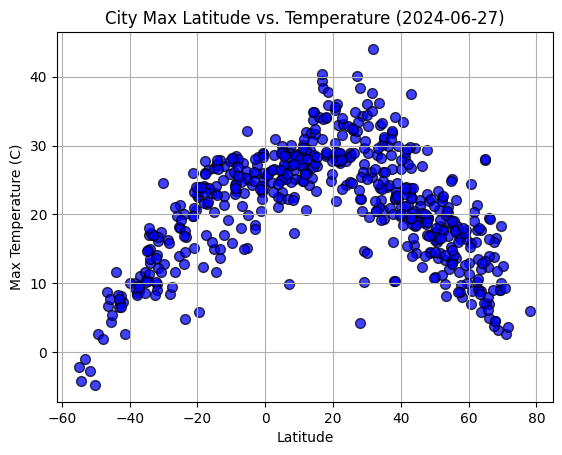

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=50, c="b", edgecolors="black", alpha=.75)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-27)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

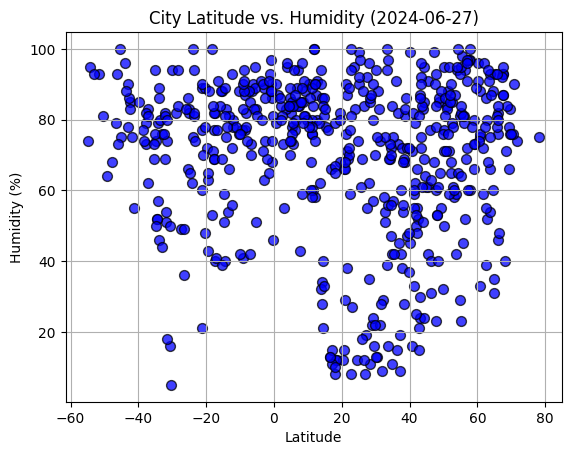

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=50, c="b", edgecolors="black", alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-27)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

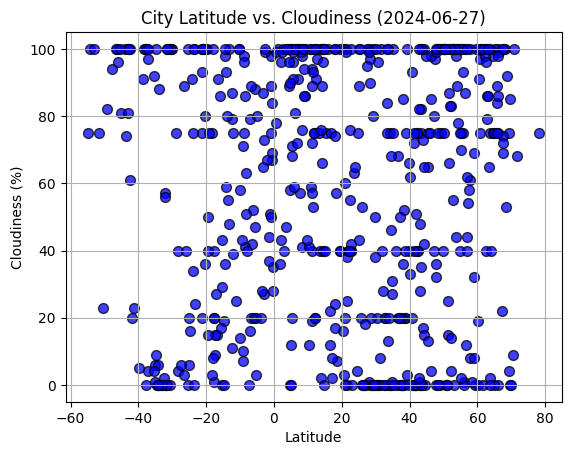

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=50, c="b", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-27)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

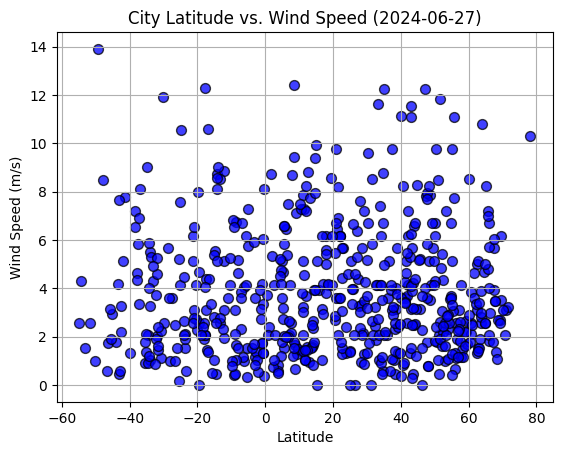

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=50, c="b", edgecolors="black", alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-27)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

To fulfill the second requirement, compute the linear regression for each relationship. Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude). You may find it helpful to define a function in order to create the linear regression plots.

Next, create a series of scatter plots. Be sure to include the linear regression line, the model's formula, and the r^2 values as you can see in the following image




In [36]:
# Define a function to create Linear Regression plots

#def linear_regression(x, y, xlabel='X', ylabel='Y'):   # works
def linear_regression(x, y, text_coordinates, xlabel='X', ylabel='Y'):
    
    # Perform linear regression using scipy
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    
    # Calculate the regression line
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the original data points
    plt.scatter(x, y, color='blue')
    
    # Plot the regression line
    plt.plot(x, regress_values, color='red', linewidth=2)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r square value
    print(f"R squared: {r_value**2}")
    
    # Show plot
    plt.show()
    

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df = northern_hemi

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kill devil hills,36.0307,-75.6760,24.01,91,40,2.06,US,2024-06-27
5,kapuskasing,49.4169,-82.4331,17.00,55,75,5.66,CA,2024-06-27
6,la ronge,55.1001,-105.2842,25.12,23,75,5.14,CA,2024-06-27
7,georgetown,5.4112,100.3354,26.96,78,20,1.54,MY,2024-06-27
8,isafjordur,66.0755,-23.1240,7.02,76,75,6.69,IS,2024-06-27


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df = southern_hemi 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,7.31,75,20,5.13,CL,2024-06-27
1,mount gambier,-37.8333,140.7667,8.52,73,100,4.63,AU,2024-06-27
2,grytviken,-54.2811,-36.5092,-4.23,95,100,4.28,GS,2024-06-27
4,adamstown,-25.0660,-130.1015,21.39,83,6,7.56,PN,2024-06-27
10,edinburgh of the seven seas,-37.0676,-12.3116,11.10,62,97,8.12,SH,2024-06-27


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.48017850225125963


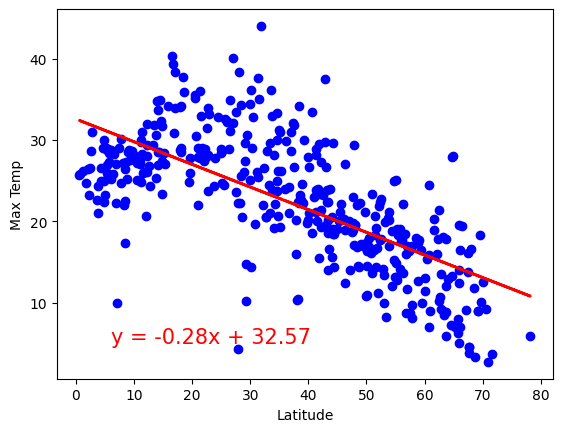

In [39]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (6,5), xlabel='Latitude', ylabel='Max Temp') 


R squared: 0.7095113382936957


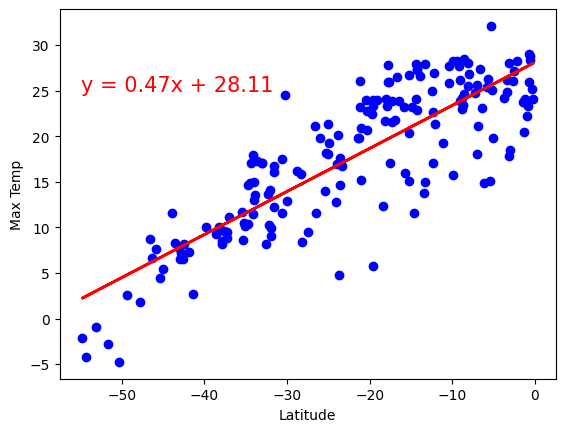

In [40]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-55,25), xlabel='Latitude', ylabel='Max Temp') 

**Discussion about the linear relationship:**  
--
In the Northern Hemisphere, the correlation between latitude and maximum temperature is negative, This means that in the Southern Hemisphere, the correlation is positive. This means that in the Northern Hemisphere, temperatures are lower at higher latitudes, and in the Southern Hemisphere, the maximum temperature increases as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.001069955713443426


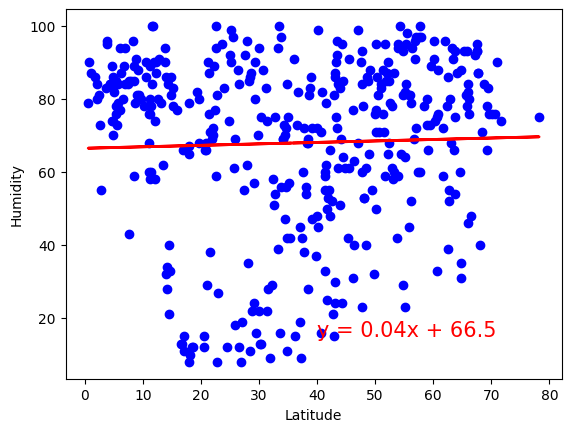

In [41]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (40,15), xlabel='Latitude', ylabel='Humidity') 


R squared: 0.001723848133572617


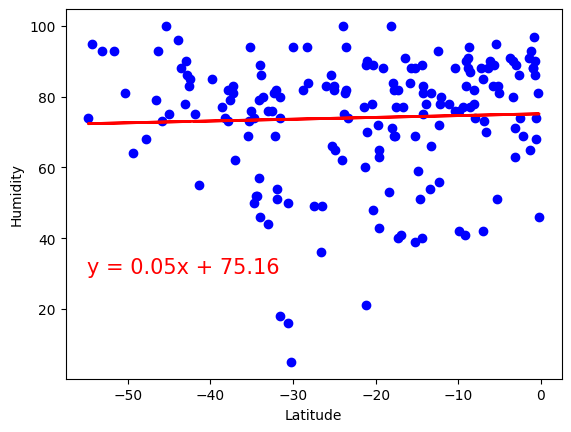

In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 30), xlabel='Latitude', ylabel='Humidity') 

**Discussion about the linear relationship:** 
--
The correlation between latitude and humidity is positive in the Northern Hemisphere and the Southern Hemisphere. This means that as latitude increases, humidity also increases. However, the R square value is very low, which indicates that there is no significant correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0006364761745585014


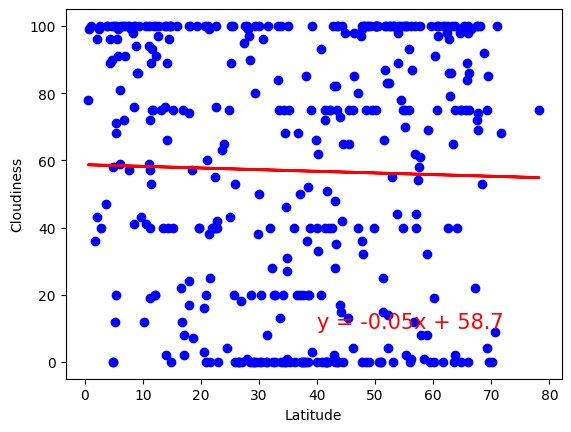

In [43]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (40, 10), xlabel='Latitude', ylabel='Cloudiness') 

R squared: 0.0034457751107892275


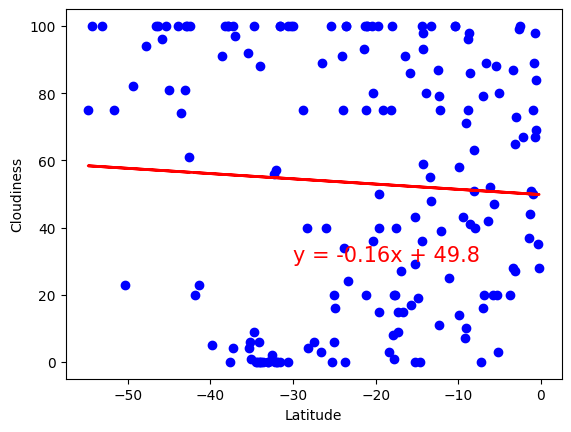

In [44]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-30,30), xlabel='Latitude', ylabel='Cloudiness') 

**Discussion about the linear relationship:** 
--
Both in the Northern Hemisphere and the Southern Hemisphere, the slopes are negative, meaning that the higher the latitude, the lower the cloudiness. However, in both hemispheres, the R-squared value is very low, indicating that there is no significant correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0006285989803612931


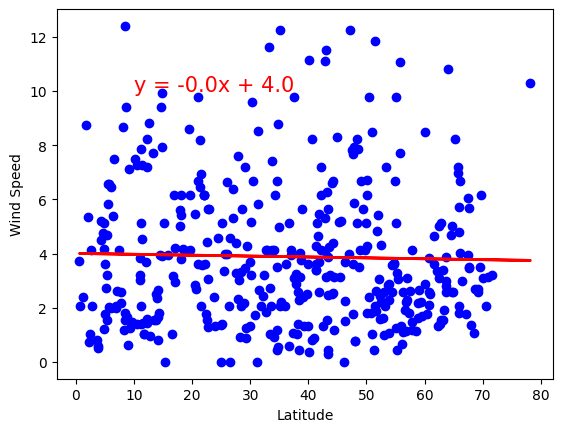

In [45]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10,10), xlabel='Latitude', ylabel='Wind Speed') 

R squared: 0.003591613257379428


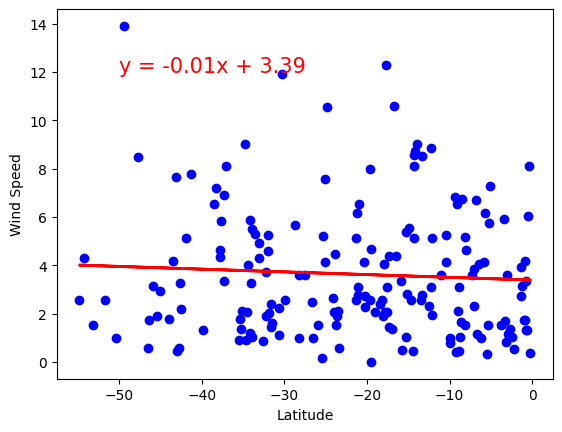

In [46]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 12), xlabel='Latitude', ylabel='Wind Speed') 

**Discussion about the linear relationship:** 
--
In both hemispheres the slope is slightly negative, indicating an insignificant variation in the decrease of wind speed with the increase in latitude. With the very low R squared values, this correlation between latitude and wind speed is insignificant.